In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 128
sns.set(style="dark",color_codes=True)
font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '16'}
plt.style.use('seaborn-whitegrid')   # 图中网格
plt.rc('font', **font)               # 步骤一（设置字体的更多属性）
plt.rc('axes', unicode_minus=False)  # 步骤二（解决坐标轴负数的负号显示问题）

# Part1 简单查看数据集

In [113]:
#读入数据
data=pd.read_csv('F:\data analysis\hanzidb\hanziDB.csv')

In [114]:
data.loc[804,'stroke_count'] = 8 #矫正错误数据
#设置类型
data['stroke_count']=data['stroke_count'].astype('int')
data['frequency_rank']=data['frequency_rank'].astype('int')
data.head(10)

,frequency_rank,charcter,pinyin,definition,radical,radical_code,stroke_count,hsk_levl,general_standard_num
0,1,的,de,"possessive, adjectival suffix",白,106.3,8,1.0,1155.0
1,2,一,yī,"one; a, an; alone",一,1.0,1,1.0,1.0
2,3,是,shì,"indeed, yes, right; to be; demonstrative prono...",日,72.5,9,1.0,1479.0
3,4,不,bù,"no, not; un-; negative prefix",一,1.3,4,1.0,91.0
4,5,了,le,to finish; particle of completed action,亅,6.1,2,1.0,17.0
5,6,在,zài,"be at, in, on; consist in, rest",土,32.3,6,1.0,388.0
6,7,人,rén,man; people; mankind; someone else,人,9.0,2,1.0,10.0
7,8,有,yǒu,"have, own, possess; exist",月,74.2,6,1.0,390.0
8,9,我,wǒ,"our, us, i, me, my, we",戈,62.3,7,1.0,761.0
9,10,他,tā,"other, another; he, she, it",人,9.3,5,1.0,277.0


In [115]:
data.sort_values(by='stroke_count',ascending=False).head(10)[['charcter','pinyin','definition','stroke_count','hsk_levl']]

,charcter,pinyin,definition,stroke_count,hsk_levl
7056,齾,yà,NaN,35,NaN
8619,鱻,xiān,"fresh, new, delicious; rare, few",33,NaN
7744,麤,cū,"rough, coarse, big, rough",33,NaN
8423,籲,yù,appeal; request; implore,32,NaN
9782,鱺,lí,eel,30,NaN
7885,麣,yán,NaN,30,NaN
6242,爨,cuàn,"oven, cooking stove; cook",30,NaN
7741,钃,shǔ,NaN,29,NaN
9361,虋,mén,asparagus a variety of red-stalked millet,29,NaN
6995,讟,dú,"slander, utter evil words",29,NaN


#### 笔画排名前十的汉字也是够了，一个都不认识,最后一列汉语等级考试都是NaN，表示不考！还有英文都无法对应的！可能就剩个读音了吧

In [116]:
data.stroke_count.describe()

count    10000.000000
mean        12.072600
std          4.431557
min          1.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         35.000000
Name: stroke_count, dtype: float64

In [117]:
data.stroke_count.name='笔画数'
data.frequency_rank.name='使用频率排名'

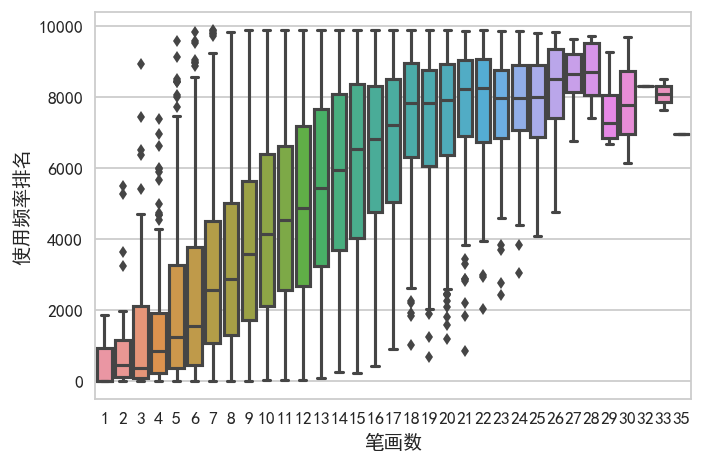

In [118]:
sns.boxplot(data.stroke_count,data.frequency_rank)

#### 上述可见使用频率排名前60%的汉字多数在17个笔画内
#### 大致趋势是笔画数越多使用频率也就越低

# Part2 更多的分析

In [119]:
hanzi = pd.read_excel('F:\\data analysis\hanzidb\hanzi_freq.xlsx')
hanzi.head()

,rank,character,freq,freq_percent,cum_freq_percent
0,1,的,7922684,4.094325,4.094325
1,2,一,3050722,1.576568,5.670893
2,3,是,2615490,1.351646,7.022539
3,4,不,2237915,1.156521,8.179061
4,5,了,2128528,1.099992,9.279052


In [120]:
#设置格式
hanzi['rank']=hanzi['rank'].astype('int')
hanzi.cum_freq_percent=hanzi.cum_freq_percent.astype('float64')

### 来看看使用频率排名和累计的使用频率

(0, 100)

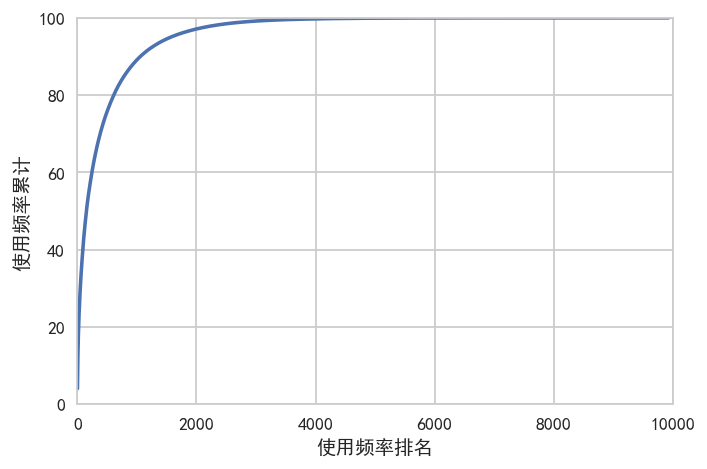

In [121]:
plt.plot(hanzi.cum_freq_percent,linewidth=2)
plt.xlabel('使用频率排名')
plt.ylabel('使用频率累计')
plt.xlim(0,10000)
plt.ylim(0,100)

#### 上述可见认识使用频率排名前4000的汉字就能认识出现的接近百分之百的汉字
#### 但还是不够精确，那么我们用其他方法来看看

### 注意到上面的曲线很像数学上对数的曲线，那么我们来取个对数试试看

In [122]:
hanzi['log_rank'] = np.log10(hanzi['rank'])
hanzi.head(10)

,rank,character,freq,freq_percent,cum_freq_percent,log_rank
0,1,的,7922684,4.094325,4.094325,0.000000
1,2,一,3050722,1.576568,5.670893,0.301030
2,3,是,2615490,1.351646,7.022539,0.477121
3,4,不,2237915,1.156521,8.179061,0.602060
4,5,了,2128528,1.099992,9.279052,0.698970
5,6,在,2009181,1.038315,10.317367,0.778151
6,7,人,1867999,0.965354,11.282721,0.845098
7,8,有,1782004,0.920913,12.203634,0.903090
8,9,我,1690048,0.873392,13.077026,0.954243
9,10,他,1595761,0.824666,13.901692,1.000000


(0, 100)

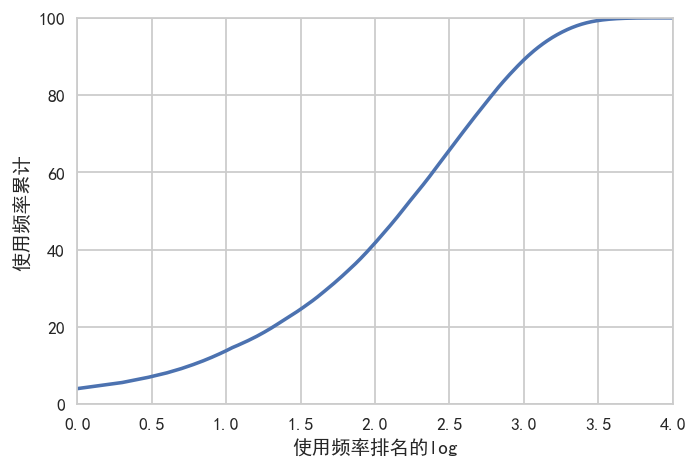

In [123]:
plt.plot(hanzi.log_rank,hanzi.cum_freq_percent,linewidth=2)
plt.xlabel('使用频率排名的log')
plt.ylabel('使用频率累计')
plt.xlim(0,4)
plt.ylim(0,100)

#### 现在看的更清楚了 在对数大概3.5多的时候就接近了100% 也就是大约3200个汉字

### 汉语等级考试所需认识的汉字量

In [124]:
numbers=[len(data[data['hsk_levl']==x]) for x in range(1,7)]
numbers_all=len(data)
numbers.append(numbers_all-sum(numbers))
labels=['level'+str(x) for x in range(1,7)]
labels.append('others')
expl = [0,0,0,0,0,0,0.1]#其他离开圆心

Text(0.5,1,'汉语等级考试中的汉字分布')

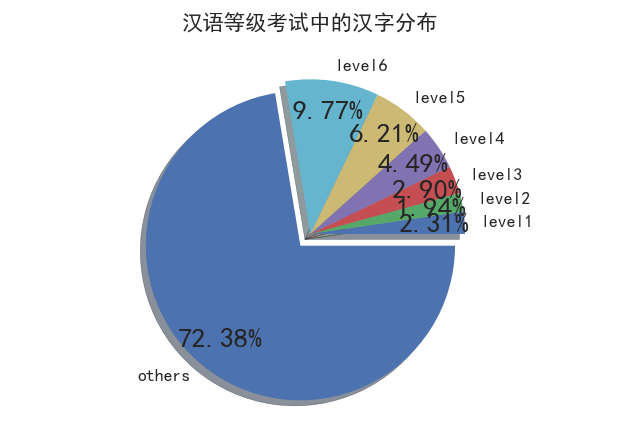

In [125]:
plt.axis('equal')   #该行代码使饼图长宽相等
plt.pie(numbers,labels=labels,explode=expl,pctdistance=0.8,autopct='%1.2f%%',shadow=True) #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("汉语等级考试中的汉字分布")

#### 看得出来即使要到六级的汉语等级考试 也只需要掌握30%不到的汉字就行，据我了解其实主要是词汇量而不是汉字量

# 肚子饿了 就先分析到这！